<a href="https://colab.research.google.com/github/Fauzia-Shereen-M/Traffic-Accident-Analysis-In-Data-Science-/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***TRAFFIC ACCIDENT ANALYSIS PROJECT***

**DATA ANALYSIS**

1. Import Required Libraries
2. Load the Dataset
3. Preview the Dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

# Load Dataset
accidents_df = pd.read_csv("traffic_accident_full_kaggle_style_dataset.csv")

# View Dataset
accidents_df.head()


,Accident_ID,Accident_Date,Time,Day_of_Week,Sunrise_Sunset,City,State,Country,Area_Type,Junction_Type,...,Driver_Gender,Driving_Experience,Injuries,Fatalities,Casualty_Class,Casualty_Severity,Accident_Severity,Accident_Cause,Alcohol_Involved,Emergency_Response_Time
0,1,2023-01-31,22:23,Tuesday,Night,Pune,TS,India,Urban,Unknown,...,Female,Beginner,4,1,Passenger,Serious,Minor,Weather,No,9
1,2,2023-12-30,10:45,Saturday,Night,Delhi,TS,India,Urban,Unknown,...,Male,Unknown,6,0,Passenger,Fatal,Minor,Overspeeding,No,13
2,3,2022-05-10,01:54,Tuesday,Night,Mumbai,WB,India,Urban,Roundabout,...,Male,Unknown,4,0,Unknown,Minor,Fatal,Signal Jump,Yes,59
3,4,2023-07-18,04:58,Tuesday,Day,Bengaluru,DL,India,Urban,Crossroad,...,Male,Intermediate,6,3,Driver,Serious,Major,Overspeeding,No,50
4,5,2023-02-04,04:50,Saturday,Night,Hyderabad,WB,India,Urban,Unknown,...,Female,Intermediate,4,0,Pedestrian,Minor,Major,Unknown,No,38


4. Dataset Shape (Rows & Columns)

In [ ]:
accidents_df.shape


(5000, 32)

5. Dataset Structure & Data Types

In [ ]:
accidents_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accident_ID              5000 non-null   int64  
 1   Accident_Date            5000 non-null   object 
 2   Time                     5000 non-null   object 
 3   Day_of_Week              5000 non-null   object 
 4   Sunrise_Sunset           5000 non-null   object 
 5   City                     5000 non-null   object 
 6   State                    5000 non-null   object 
 7   Country                  5000 non-null   object 
 8   Area_Type                5000 non-null   object 
 9   Junction_Type            4026 non-null   object 
 10  Light_Condition          5000 non-null   object 
 11  Road_Surface_Type        5000 non-null   object 
 12  Road_Condition           5000 non-null   object 
 13  Weather                  5000 non-null   object 
 14  Temperature             

6. Statistical Summary (Numerical Data)
7. Statistical Summary (Categorical + Numerical)

In [ ]:
accidents_df.describe()
accidents_df.describe(include="all")


,Accident_ID,Accident_Date,Time,Day_of_Week,Sunrise_Sunset,City,State,Country,Area_Type,Junction_Type,...,Driver_Gender,Driving_Experience,Injuries,Fatalities,Casualty_Class,Casualty_Severity,Accident_Severity,Accident_Cause,Alcohol_Involved,Emergency_Response_Time
count,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000,4026,...,5000,5000,5000.000000,5000.000000,5000,5000,5000,5000,5000,5000.000000
unique,NaN,1433,1397,7,2,7,6,1,3,4,...,3,4,NaN,NaN,4,3,3,6,2,NaN
top,NaN,2021-10-23,12:12,Tuesday,Night,Kolkata,TN,India,Highway,Unknown,...,Female,Intermediate,NaN,NaN,Driver,Fatal,Minor,Unknown,No,NaN
freq,NaN,10,9,745,2553,745,866,5000,1694,1078,...,2388,1273,NaN,NaN,1282,1698,3013,865,3791,NaN
mean,2500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.486800,1.499400,NaN,NaN,NaN,NaN,NaN,31.972000
std,1443.520003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.286585,1.129183,NaN,NaN,NaN,NaN,NaN,16.055378
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,5.000000
25%,1250.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,18.000000
50%,2500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.500000,2.000000,NaN,NaN,NaN,NaN,NaN,32.000000
75%,3750.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,NaN,NaN,46.000000


8. Identify Numerical and Categorical Columns

In [ ]:
numerical_cols = accidents_df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = accidents_df.select_dtypes(include=["object"]).columns

numerical_cols, categorical_cols


(Index(['Accident_ID', 'Temperature', 'Visibility', 'Wind_Speed', 'Humidity',
        'No_of_Vehicles', 'Vehicle_Service_Year', 'Injuries', 'Fatalities',
        'Emergency_Response_Time'],
       dtype='object'),
 Index(['Accident_Date', 'Time', 'Day_of_Week', 'Sunrise_Sunset', 'City',
        'State', 'Country', 'Area_Type', 'Junction_Type', 'Light_Condition',
        'Road_Surface_Type', 'Road_Condition', 'Weather', 'Vehicle_Type',
        'Driver_Age_Band', 'Driver_Gender', 'Driving_Experience',
        'Casualty_Class', 'Casualty_Severity', 'Accident_Severity',
        'Accident_Cause', 'Alcohol_Involved'],
       dtype='object'))

9. Check Missing Values

In [ ]:
accidents_df.isnull().sum()


,0
Accident_ID,0
Accident_Date,0
Time,0
Day_of_Week,0
Sunrise_Sunset,0
City,0
State,0
Country,0
Area_Type,0
Junction_Type,974


10. Check Duplicate Records

In [ ]:
accidents_df.duplicated().sum()


np.int64(0)

**DATA CLEANING**

1. Remove Duplicate Records

In [5]:
accidents_df = accidents_df.drop_duplicates()
accidents_df


,Accident_ID,Accident_Date,Time,Day_of_Week,Sunrise_Sunset,City,State,Country,Area_Type,Junction_Type,...,Driver_Gender,Driving_Experience,Injuries,Fatalities,Casualty_Class,Casualty_Severity,Accident_Severity,Accident_Cause,Alcohol_Involved,Emergency_Response_Time
0,1,2023-01-31,22:23,Tuesday,Night,Pune,TS,India,Urban,Unknown,...,Female,Beginner,4,1,Passenger,Serious,Minor,Weather,No,9
1,2,2023-12-30,10:45,Saturday,Night,Delhi,TS,India,Urban,Unknown,...,Male,Unknown,6,0,Passenger,Fatal,Minor,Overspeeding,No,13
2,3,2022-05-10,01:54,Tuesday,Night,Mumbai,WB,India,Urban,Roundabout,...,Male,Unknown,4,0,Unknown,Minor,Fatal,Signal Jump,Yes,59
3,4,2023-07-18,04:58,Tuesday,Day,Bengaluru,DL,India,Urban,Crossroad,...,Male,Intermediate,6,3,Driver,Serious,Major,Overspeeding,No,50
4,5,2023-02-04,04:50,Saturday,Night,Hyderabad,WB,India,Urban,Unknown,...,Female,Intermediate,4,0,Pedestrian,Minor,Major,Unknown,No,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2021-07-26,12:21,Monday,Day,Chennai,WB,India,Urban,Crossroad,...,Female,Intermediate,2,2,Pedestrian,Fatal,Major,Weather,Yes,21
4996,4997,2022-07-27,04:19,Wednesday,Day,Hyderabad,WB,India,Highway,Crossroad,...,Female,Unknown,0,1,Unknown,Minor,Minor,Drunk Driving,Yes,31
4997,4998,2023-07-23,15:59,Sunday,Night,Bengaluru,DL,India,Urban,Crossroad,...,Female,Experienced,5,1,Pedestrian,Fatal,Major,Signal Jump,No,47
4998,4999,2022-12-07,21:53,Wednesday,Night,Chennai,TS,India,Rural,Crossroad,...,Female,Beginner,0,2,Driver,Serious,Minor,Weather,No,16


2. Handle Missing Values

In [8]:
accidents_df["Junction_Type"] = accidents_df["Junction_Type"].fillna("Unknown")
accidents_df.isnull().sum()



,0
Accident_ID,0
Accident_Date,0
Time,0
Day_of_Week,0
Sunrise_Sunset,0
City,0
State,0
Country,0
Area_Type,0
Junction_Type,0


3. Standardize Text Columns (Formatting)

In [ ]:
accidents_df["Accident_Severity"] = accidents_df["Accident_Severity"].str.title()
accidents_df["Weather"] = accidents_df["Weather"].str.title()
accidents_df["Vehicle_Type"] = accidents_df["Vehicle_Type"].str.title()
accidents_df.head()

,Accident_ID,Accident_Date,Time,Day_of_Week,Sunrise_Sunset,City,State,Country,Area_Type,Junction_Type,...,Driver_Gender,Driving_Experience,Injuries,Fatalities,Casualty_Class,Casualty_Severity,Accident_Severity,Accident_Cause,Alcohol_Involved,Emergency_Response_Time
0,1,2023-01-31,22:23,Tuesday,Night,Pune,TS,India,Urban,Unknown,...,Female,Beginner,4,1,Passenger,Serious,Minor,Weather,No,9
1,2,2023-12-30,10:45,Saturday,Night,Delhi,TS,India,Urban,Unknown,...,Male,Unknown,6,0,Passenger,Fatal,Minor,Overspeeding,No,13
2,3,2022-05-10,01:54,Tuesday,Night,Mumbai,WB,India,Urban,Roundabout,...,Male,Unknown,4,0,Unknown,Minor,Fatal,Signal Jump,Yes,59
3,4,2023-07-18,04:58,Tuesday,Day,Bengaluru,DL,India,Urban,Crossroad,...,Male,Intermediate,6,3,Driver,Serious,Major,Overspeeding,No,50
4,5,2023-02-04,04:50,Saturday,Night,Hyderabad,WB,India,Urban,Unknown,...,Female,Intermediate,4,0,Pedestrian,Minor,Major,Unknown,No,38


4. Normalize Gender Values

In [ ]:
accidents_df["Driver_Gender"] = accidents_df["Driver_Gender"].replace(
    {"M":"Male","F":"Female","Others":"Unknown","Other":"Unknown"}
)
accidents_df["Driver_Gender"].value_counts()


,count
Driver_Gender,
Female,2388
Male,2348
Unknown,264


5. Convert Date Column to DateTime Format

In [15]:
accidents_df["Accident_Date"] = pd.to_datetime(accidents_df["Accident_Date"]).head()
accidents_df.head()

,Accident_ID,Accident_Date,Time,Day_of_Week,Sunrise_Sunset,City,State,Country,Area_Type,Junction_Type,...,Driving_Experience,Injuries,Fatalities,Casualty_Class,Casualty_Severity,Accident_Severity,Accident_Cause,Alcohol_Involved,Emergency_Response_Time,Month
0,1,2023-01-31,22:23,Tuesday,Night,Pune,TS,India,Urban,Unknown,...,Beginner,4,1,Passenger,Serious,Minor,Weather,No,9,Jan
1,2,2023-12-30,10:45,Saturday,Night,Delhi,TS,India,Urban,Unknown,...,Unknown,6,0,Passenger,Fatal,Minor,Overspeeding,No,13,Dec
2,3,2022-05-10,01:54,Tuesday,Night,Mumbai,WB,India,Urban,Roundabout,...,Unknown,4,0,Unknown,Minor,Fatal,Signal Jump,Yes,59,May
3,4,2023-07-18,04:58,Tuesday,Day,Bengaluru,DL,India,Urban,Crossroad,...,Intermediate,6,3,Driver,Serious,Major,Overspeeding,No,50,Jul
4,5,2023-02-04,04:50,Saturday,Night,Hyderabad,WB,India,Urban,Unknown,...,Intermediate,4,0,Pedestrian,Minor,Major,Unknown,No,38,Feb


6. Extract Month from Accident Date

In [18]:
accidents_df["Month"] = accidents_df["Accident_Date"].dt.month_name().str[:3]
accidents_df.head()


,Accident_ID,Accident_Date,Time,Day_of_Week,Sunrise_Sunset,City,State,Country,Area_Type,Junction_Type,...,Driving_Experience,Injuries,Fatalities,Casualty_Class,Casualty_Severity,Accident_Severity,Accident_Cause,Alcohol_Involved,Emergency_Response_Time,Month
0,1,2023-01-31,22:23,Tuesday,Night,Pune,TS,India,Urban,Unknown,...,Beginner,4,1,Passenger,Serious,Minor,Weather,No,9,Jan
1,2,2023-12-30,10:45,Saturday,Night,Delhi,TS,India,Urban,Unknown,...,Unknown,6,0,Passenger,Fatal,Minor,Overspeeding,No,13,Dec
2,3,2022-05-10,01:54,Tuesday,Night,Mumbai,WB,India,Urban,Roundabout,...,Unknown,4,0,Unknown,Minor,Fatal,Signal Jump,Yes,59,May
3,4,2023-07-18,04:58,Tuesday,Day,Bengaluru,DL,India,Urban,Crossroad,...,Intermediate,6,3,Driver,Serious,Major,Overspeeding,No,50,Jul
4,5,2023-02-04,04:50,Saturday,Night,Hyderabad,WB,India,Urban,Unknown,...,Intermediate,4,0,Pedestrian,Minor,Major,Unknown,No,38,Feb


7. Verify Important Columns

In [ ]:
accidents_df[["Accident_Severity", "Injuries", "Fatalities", "Severity_Label"]].head()


,Accident_Severity,Injuries,Fatalities,Severity_Label
0,Minor,4,1,Minor
1,Minor,6,0,Minor
2,Fatal,4,0,Fatal
3,Major,6,3,Severe
4,Major,4,0,Severe


**DEEP ANALYSIS**

**1.City-wise Accident Count (GROUP BY)**

In [9]:
accidents_df.groupby("City")["Accident_ID"].count()


,Accident_ID
City,
Bengaluru,715
Chennai,740
Delhi,662
Hyderabad,706
Kolkata,745
Mumbai,707
Pune,725


**2.Average Injuries per Accident by City**

In [10]:
accidents_df.groupby("City")["Injuries"].mean()


,Injuries
City,
Bengaluru,3.398601
Chennai,3.474324
Delhi,3.696375
Hyderabad,3.543909
Kolkata,3.451007
Mumbai,3.328147
Pune,3.531034


**3.Month-wise Accident Trend**

In [11]:
accidents_df["Accident_Date"] = pd.to_datetime(accidents_df["Accident_Date"])
accidents_df["Month"] = accidents_df["Accident_Date"].dt.month_name()

accidents_df.groupby("Month")["Accident_ID"].count()


,Accident_ID
Month,
April,389
August,408
December,413
February,416
January,522
July,439
June,393
March,390
May,435


**4.State-wise Fatalities**

In [12]:
accidents_df.groupby("State")["Fatalities"].sum()


,Fatalities
State,
DL,1328
KA,1306
MH,1149
TN,1289
TS,1144
WB,1281


**DATA VISUALIZATION**

**1.Accidents by City**

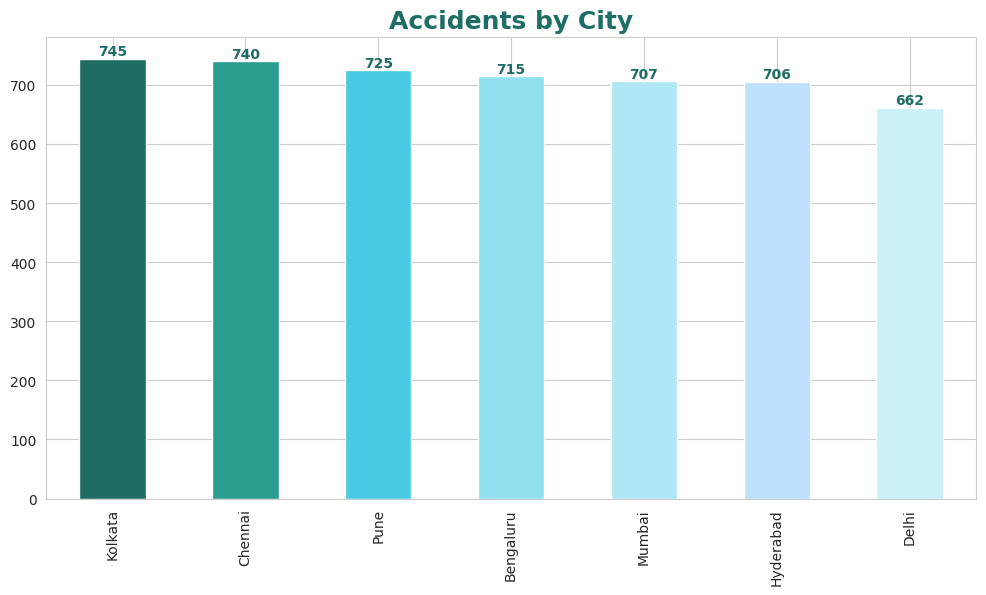

In [ ]:
city_counts = accidents_df["City"].value_counts().head(7)

colors = ["#1D6D64","#2A9D8F","#48CAE4","#90E0EF","#ADE8F4","#BDE0FE","#CAF0F8"]

sns.set_style("whitegrid")
ax = city_counts.plot(kind="bar", color=colors, figsize=(12,6))

ax.bar_label(ax.containers[0], fontweight="bold", color="#1D6D64")
plt.title("Accidents by City", fontsize=18, fontweight="bold", color="#1D6D64")
plt.ylabel(""); plt.xlabel("")
plt.show()


**2. Accident Severity Distribution (Donut Chart)**

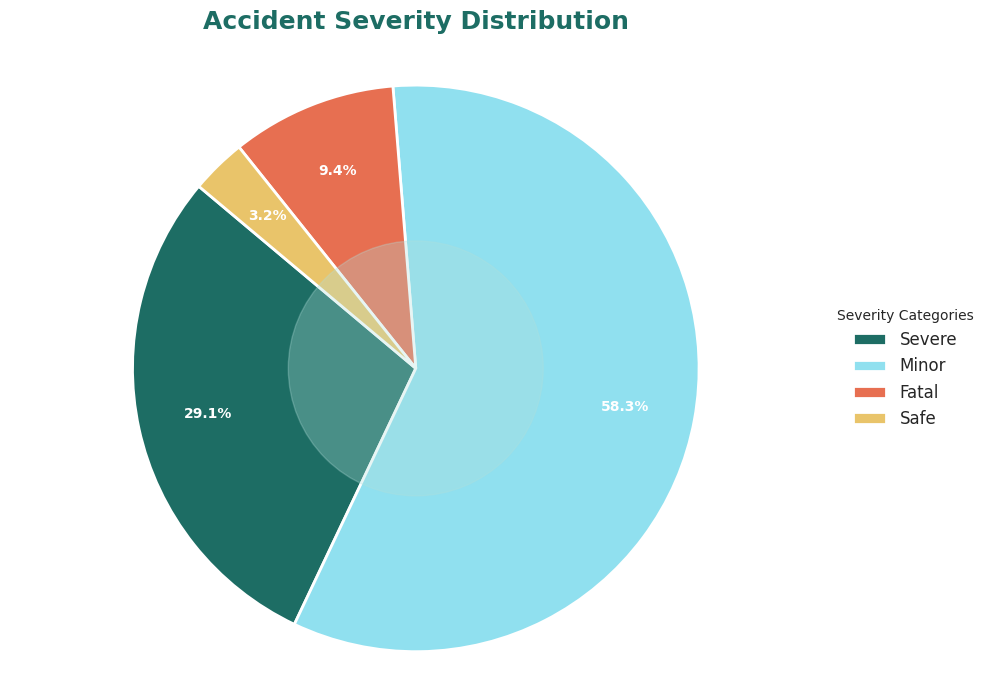

In [ ]:
labels = ["Severe", "Minor", "Fatal", "Safe"]
# Ensure you are using the correct dataframe name (df or accidents_df)
sizes = [df["Severity_Label"].value_counts().get(l,0) for l in labels]
colors = ["#1D6D64", "#90E0EF", "#E76F51", "#E9C46A"]

fig, ax = plt.subplots(figsize=(10, 7), facecolor='white')

# Create the pie slices
wedges, texts, autotexts = ax.pie(sizes, colors=colors, autopct="%1.1f%%",
                                  startangle=140, pctdistance=0.75,
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add the center circle for the donut effect
ax.add_artist(plt.Circle((0,0), 0.45, color='#B2DFDB', alpha=0.3, zorder=10))
plt.setp(autotexts, size=10, weight="bold", color="white")

# --- ADDING THE BULLETS (LEGEND) ---
ax.legend(wedges, labels,
          title="Severity Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), # Places bullets to the right of the chart
          fontsize=12,
          frameon=False) # Removes the box for a clean bullet-list look

plt.title("Accident Severity Distribution", fontsize=18, fontweight="bold", color="#1D6D64", pad=20)
ax.axis('equal')
plt.tight_layout()
plt.show()

**3. Accidents by Weather Condition**

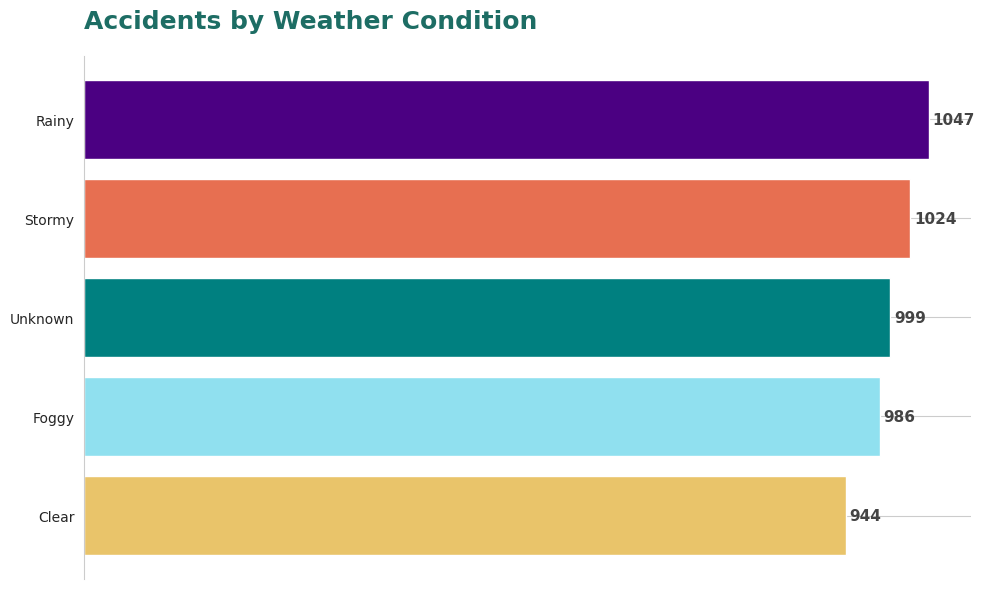

In [ ]:
w_counts = accidents_df["Weather"].value_counts().sort_values()

color_map = {
    "Rainy": "#4B0082",
    "Clear": "#E9C46A",
    "Stormy": "#E76F51",
    "Foggy": "#90E0EF",
    "Unknown": "#008080"
}

colors = [color_map.get(w, "#008080") for w in w_counts.index]

fig, ax = plt.subplots(figsize=(10,6), facecolor='white')
bars = ax.barh(w_counts.index, w_counts.values, color=colors)

# Add numeric labels to each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}',
            va='center', fontsize=11, fontweight='bold', color='#444444')

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False) # Hide x-axis since we have labels

plt.title("Accidents by Weather Condition", fontsize=18, fontweight="bold", color="#1D6D64", loc='left', pad=20)
plt.tight_layout()
plt.show()

**4. Accident Severity Trend Over Time**

In [ ]:
# Create Severity_Label FIRST
accidents_df["Severity_Label"] = accidents_df["Accident_Severity"].replace("Major", "Severe")

accidents_df.loc[
    (accidents_df["Injuries"] == 0) & (accidents_df["Fatalities"] == 0),
    "Severity_Label"
] = "Safe"

# Create Month
accidents_df["Month"] = pd.to_datetime(accidents_df["Accident_Date"]).dt.strftime("%b")

# Now create trend
trend = accidents_df.groupby(
    ["Month", "Severity_Label"]
).size().unstack(fill_value=0)


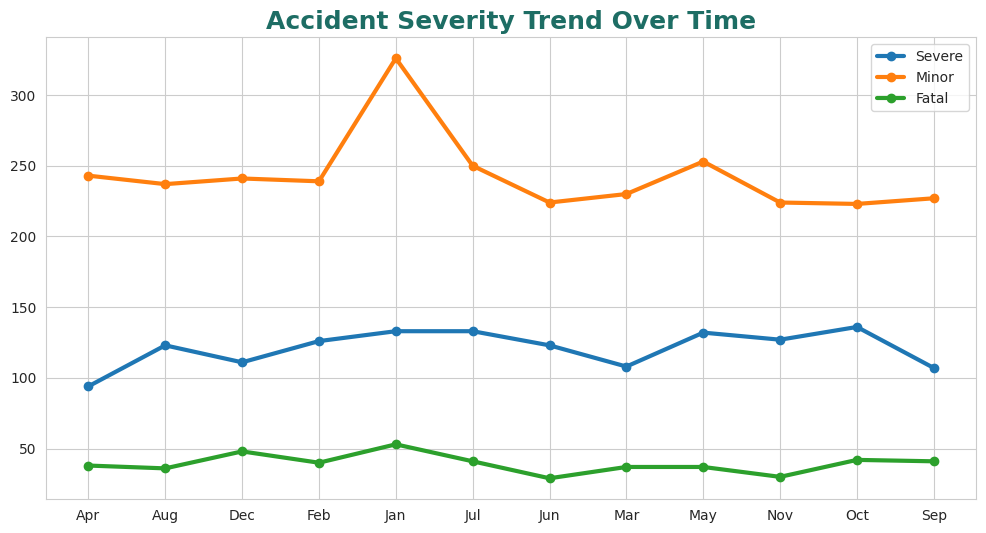

In [ ]:

# Line chart
plt.figure(figsize=(12,6))
plt.plot(trend.index, trend["Severe"], marker="o", linewidth=3, label="Severe")
plt.plot(trend.index, trend["Minor"], marker="o", linewidth=3, label="Minor")
plt.plot(trend.index, trend["Fatal"], marker="o", linewidth=3, label="Fatal")

plt.title("Accident Severity Trend Over Time",fontsize=18, fontweight="bold", color="#1D6D64")
plt.grid(True)
plt.legend()
plt.show()


**5.Severity Probability by Road Condition**

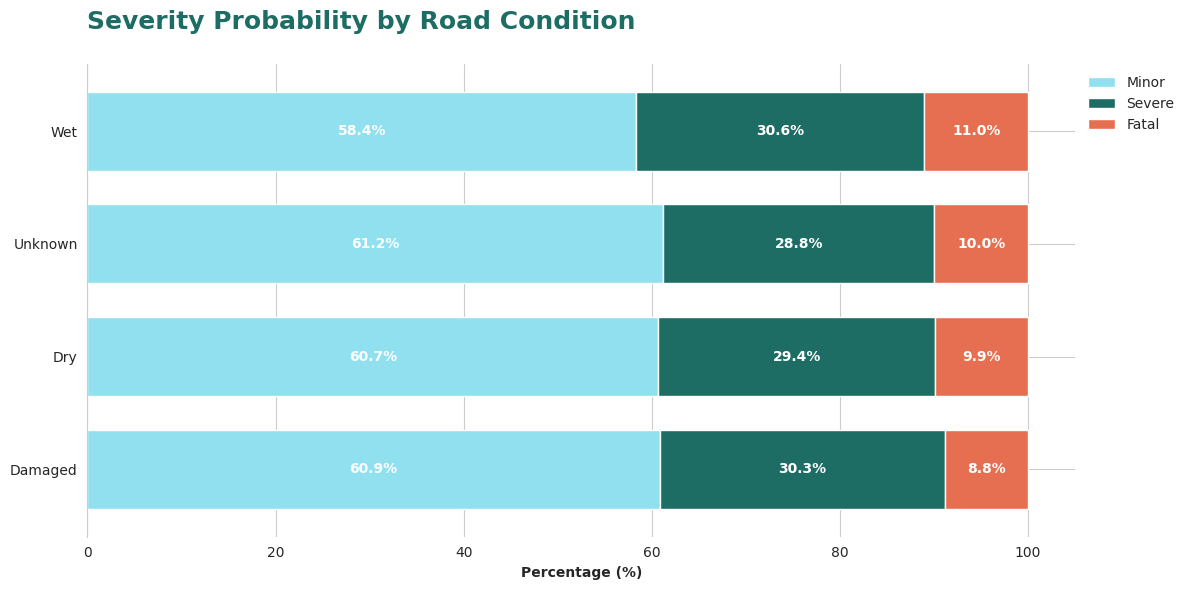

In [ ]:
# 1. Prep Data
df = pd.read_csv('traffic_accident_full_kaggle_style_dataset.csv')
df['S'] = df['Accident_Severity'].replace('Major', 'Severe')

# Create a cross-tabulation and normalize it to 100%
ct = pd.crosstab(df['Road_Condition'], df['S'], normalize='index') * 100
ct = ct.reindex(columns=['Minor', 'Severe', 'Fatal']) # Keep your dashboard order

colors = ['#90E0EF', '#1D6D64', '#E76F51']

# 2. Plotting
ax = ct.plot(kind='barh', stacked=True, figsize=(12, 6), color=colors, width=0.7)

# 3. Styling
ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_facecolor('white')

# Add percentage labels inside the bars
for p in ax.patches:
    width = p.get_width()
    if width > 5: # Only show label if the slice is big enough
        ax.text(p.get_x() + width/2, p.get_y() + p.get_height()/2,
                f'{width:.1f}%', va='center', ha='center',
                color='white', weight='bold', fontsize=10)

plt.title("Severity Probability by Road Condition", size=18, weight='bold', color='#1D6D64', loc='left', pad=25)
plt.legend(bbox_to_anchor=(1, 1), frameon=False)
plt.xlabel("Percentage (%)", weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

**Regression (Target Variable or Dependent Variable)**

In [ ]:
# 1. Load data
df = pd.read_csv('traffic_accident_full_kaggle_style_dataset.csv')

# 2. Setup the Topic (Target)
# We find the 'Sunrise_Sunset' column and map it to 1 and 0
if 'Sunrise_Sunset' in df.columns:
    df['target'] = df['Sunrise_Sunset'].map({'Day': 1, 'Night': 0})
else:
    # If that name is wrong, we'll use the last column as the target
    df['target'] = df.iloc[:, -1]

# 3. SMART FEATURE SELECTION
# Automatically grab all numeric columns and drop the target from the features
X = df.select_dtypes(include=['number']).drop(columns=['target']).dropna()
y = df.loc[X.index, 'target']

# 4. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train and Predict
model = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 6. Output Results
print(f"Model successfully trained using columns: {list(X.columns)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")

Model successfully trained using columns: ['Accident_ID', 'Temperature', 'Visibility', 'Wind_Speed', 'Humidity', 'No_of_Vehicles', 'Vehicle_Service_Year', 'Injuries', 'Fatalities', 'Emergency_Response_Time']
Accuracy: 48.80%


**Classification((Predicting Day vs. Night))**

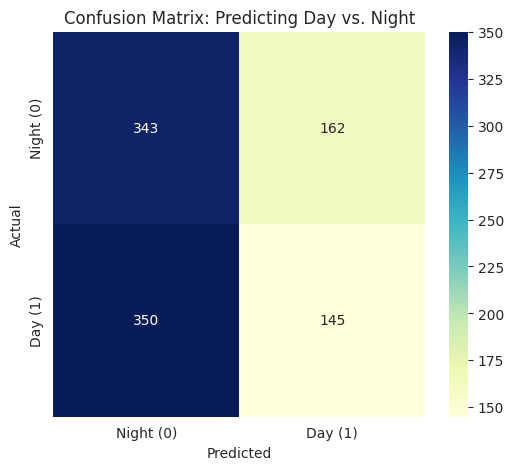

              precision    recall  f1-score   support

           0       0.49      0.68      0.57       505
           1       0.47      0.29      0.36       495

    accuracy                           0.49      1000
   macro avg       0.48      0.49      0.47      1000
weighted avg       0.48      0.49      0.47      1000



In [ ]:
# Convert 'Day'/'Night' to 1/0
if 'Sunrise_Sunset' in df.columns:
    df['Sunrise_Sunset'] = df['Sunrise_Sunset'].map({'Day': 1, 'Night': 0})

# 2. Select numeric features and drop missing values
df_numeric = df.select_dtypes(include=['number']).dropna()

# 3. Define X and y (Target = Sunrise_Sunset)
X = df_numeric.drop(columns=['Sunrise_Sunset'])
y = df_numeric['Sunrise_Sunset']

# 4. Split, Scale, and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# 5. Confusion Matrix Visualization
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Night (0)', 'Day (1)'],
            yticklabels=['Night (0)', 'Day (1)'])
plt.title('Confusion Matrix: Predicting Day vs. Night')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))